In [131]:
from heading import*
import torch

In [132]:
class CONV_net(torch.nn.Module):
    def __init__(self, input_channels = 1, output_size = 9):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1,16,3,2,1), nn.MaxPool2d(2), nn.ReLU(), nn.BatchNorm2d(16))
        self.conv2 = nn.Sequential(nn.Conv2d(16,32,3,1,1), nn.MaxPool2d(2), nn.ReLU(), nn.BatchNorm2d(32))
        self.fc1 = nn.Sequential(nn.Linear(288,120), nn.Dropout(0.5), nn.ReLU())
        self.fc2 = nn.Sequential(nn.Linear(120,60), nn.Dropout(0.5), nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(60,20), nn.Dropout(0.5), nn.ReLU())
    def forward(self, x):
        x = self.conv1(x)    
        x = self.conv2(x)    
        x = x.view(-1,288)  
        x = self.fc1(x)         
        x = self.fc2(x)         
        x = self.fc3(x)         
        return x

In [133]:
convlution = CONV_net(input_channels = 1, output_size = 9)

In [134]:
net_work = create_network(convlution)

In [125]:
image_size = 28

In [126]:
transform = resize_image(image_size)

In [135]:
BATCH_SIZE = 64

In [136]:
train_data = load_mnist_data(transform, 64, True, PATH = 'Fashion_Data_Data')
test_data = load_mnist_data(transform, 64, True, PATH = 'Fashion_Data_Data')

[1 8 0 9 7 4 0 1 1 7 0 2 3 5 3 6 5 4 9 4 1 1 7 5 6 2 3 7 4 3 0 3 5 1 9 8 2
 1 2 5 3 9 6 1 0 9 4 4 9 4 5 7 4 3 7 9 6 0 7 5 3 1 9 3]


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

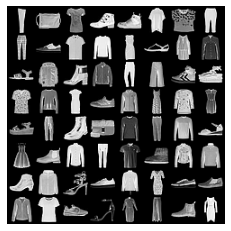

In [137]:
view_datasets(train_data)

In [139]:
EPOCH = 3
learning_rate = 0.001

In [140]:
trained_model = train_model(net_work, train_data, learning_rate, EPOCH)

[1,100] loss:2.543
[1,200] loss:2.157
[1,300] loss:2.042
[1,400] loss:2.021
[1,500] loss:1.965
[1,600] loss:1.947
[1,700] loss:1.932
[1,800] loss:1.963
[1,900] loss:1.902
[2,100] loss:1.919
[2,200] loss:1.857
[2,300] loss:1.874
[2,400] loss:1.852
[2,500] loss:1.872
[2,600] loss:1.854
[2,700] loss:1.866
[2,800] loss:1.834
[2,900] loss:1.797
[3,100] loss:1.851
[3,200] loss:1.852
[3,300] loss:1.854
[3,400] loss:1.772
[3,500] loss:1.813
[3,600] loss:1.796
[3,700] loss:1.825
[3,800] loss:1.800
[3,900] loss:1.808


In [141]:
tested_model = test_model(trained_model, test_data)

correct1:  tensor(53345)
Test acc: 0.8890833333333333


[6 2 4 7 6 1 8 6 1 4 8 2 5 2 6 7 8 0 3 1]
The predict result is [6 2 4 7 6 1 8 4 1 4 8 2 5 2 3 7 8 0 3 1]


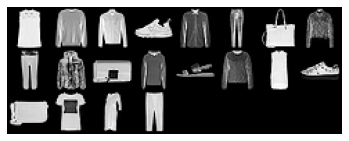

In [142]:
predict_image(trained_model, image_size, 20)